<a href="https://colab.research.google.com/github/plaban1981/INEURON/blob/Data_Science_Master/Logistic_Regression_Purchase_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-plot

In [0]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

In [0]:
# Let's use the handy function we created
def adj_r2(x,y,r2):
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

##load data

In [3]:
from google.colab import files
files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


{'Social_Network_Ads.csv': b'User ID,Gender,Age,EstimatedSalary,Purchased\r\n15624510,Male,19,19000,0\r\n15810944,Male,35,20000,0\r\n15668575,Female,26,43000,0\r\n15603246,Female,27,57000,0\r\n15804002,Male,19,76000,0\r\n15728773,Male,27,58000,0\r\n15598044,Female,27,84000,0\r\n15694829,Female,32,150000,1\r\n15600575,Male,25,33000,0\r\n15727311,Female,35,65000,0\r\n15570769,Female,26,80000,0\r\n15606274,Female,26,52000,0\r\n15746139,Male,20,86000,0\r\n15704987,Male,32,18000,0\r\n15628972,Male,18,82000,0\r\n15697686,Male,29,80000,0\r\n15733883,Male,47,25000,1\r\n15617482,Male,45,26000,1\r\n15704583,Male,46,28000,1\r\n15621083,Female,48,29000,1\r\n15649487,Male,45,22000,1\r\n15736760,Female,47,49000,1\r\n15714658,Male,48,41000,1\r\n15599081,Female,45,22000,1\r\n15705113,Male,46,23000,1\r\n15631159,Male,47,20000,1\r\n15792818,Male,49,28000,1\r\n15633531,Female,47,30000,1\r\n15744529,Male,29,43000,0\r\n15669656,Male,31,18000,0\r\n15581198,Male,31,74000,0\r\n15729054,Female,27,137000,1\r\n1

In [5]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [2]:
!pip install -U pandas_profiling

     |████████████████████████████████| 194kB 4.9MB/s 
     |████████████████████████████████| 614kB 32.0MB/s 
     |████████████████████████████████| 1.5MB 36.9MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 256kB 44.8MB/s 
     |████████████████████████████████| 307kB 48.3MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 215kB 41.4MB/s 
     |████████████████████████████████| 747kB 42.8MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241329 sha256=3bc4c9d32d9bddf67decf79aaff5ba28daa414eca4bee9ad3ac20a0c11e5b1a7
  Stored in directory: /root/.cache/pip/wheels/9b/c9/f1/4a2f30c760e017f3e2f46be999c4597a93d126ef5ea38e276f
  Created wheel for confuse: filename=confuse-1.0.0-cp36-none-any.whl size=17487 sha256=47af451ebad99eae02d9ec4

In [6]:
import pandas_profiling
data.profile_report()

In [7]:
profile = data.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file='Pandas Profiling Report — Social_Network_Ads.html')

Seems like there is no missing values in our data. Great, let's see the distribution of data:

In [8]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

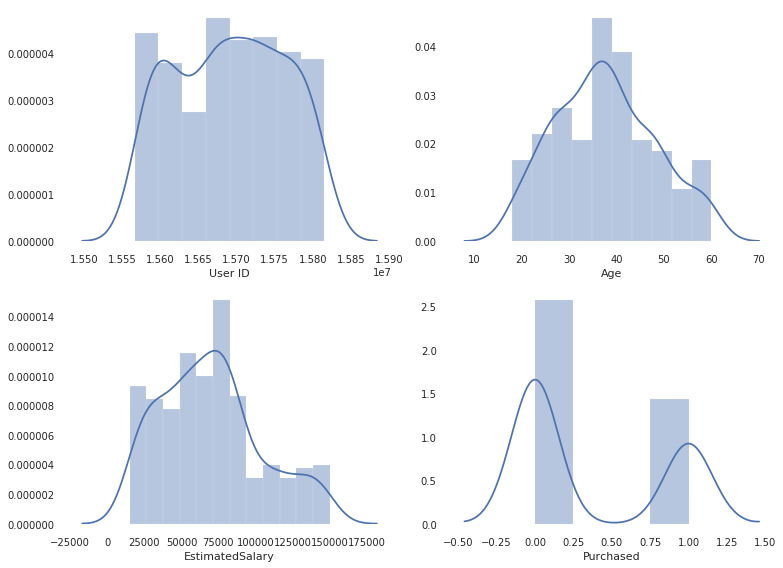

In [9]:
# let's see how data is distributed for every column
plt.figure(figsize=(11,8), facecolor='white')

# plot numbering starts at 1, not 0
plot_number = 1

cols = [col for col in data.columns if data[col].dtypes != 'O']


for col in cols:
  ax = plt.subplot(2, 2, plot_number)
  sns.distplot(data[col])
  ax.set_xlabel(col)
  # Go to the next plot for the next loop
  plot_number = plot_number + 1
plt.tight_layout()

The data looks much better now than before. We will start our analysis with this data now as we don't want to loose important information.
If our model doesn't work with accuracy, we will come back for more preprocessing.



In [0]:
X = data.drop(columns = ['Purchased','User ID'],axis=1)
y = data['Purchased']

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

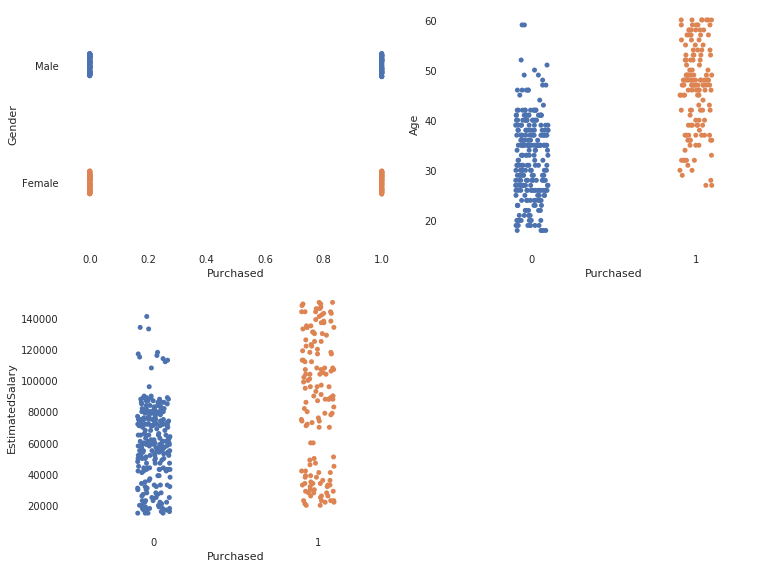

In [11]:
# let's see how data is distributed for every column
plt.figure(figsize=(11,8), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(2,2,plotnumber)
        sns.stripplot(y,X[column])
        #plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great!! Let's proceed with checking multicollineairty in the dependent variables.
Before that, we should scale our data. Let's use standardscaler for that.

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state = 355)

In [13]:
print(X_train.shape,X_test.shape)

(300, 3) (100, 3)


In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 93 to 254
Data columns (total 3 columns):
Gender             300 non-null object
Age                300 non-null int64
EstimatedSalary    300 non-null int64
dtypes: int64(2), object(1)
memory usage: 9.4+ KB


In [15]:
X_train.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [0]:
X_test.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
cat_col = [col for col in X.columns if X[col].dtypes == 'O']
lb = LabelEncoder()
for col in cat_col :
  col_name = col +"_enc"
  X_train[col_name] = lb.fit_transform(X_train[col])
  X_test[col_name] = lb.fit_transform(X_test[col])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
X_train.head()

,Gender,Age,EstimatedSalary,Gender_enc
93,Female,29,28000,0
222,Male,37,144000,1
350,Female,38,113000,0
332,Male,42,65000,1
282,Male,37,70000,1


In [15]:
X_train.drop('Gender',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
X_test.head()

,Gender,Age,EstimatedSalary,Gender_enc
253,Female,37,146000,0
337,Male,35,79000,1
374,Female,37,80000,0
155,Female,31,15000,0
363,Female,42,79000,0


In [17]:
X_test.drop('Gender',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
X_test.head()

,Age,EstimatedSalary,Gender_enc
253,37,146000,0
337,35,79000,1
374,37,80000,0
155,31,15000,0
363,42,79000,0


In [0]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

This is how our data looks now after scaling. Great, now we will check for multicollinearity using VIF(Variance Inflation factor)

In [0]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_train.columns)

In [31]:
X_train_scaled.head()

,Age,EstimatedSalary,Gender_enc
0,-0.823388,-1.235755,-1.0
1,-0.067119,2.179721,1.0
2,0.027415,1.266965,-1.0
3,0.405549,-0.146335,1.0
4,-0.067119,0.000883,1.0


In [32]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_train_scaled.values,i) for i in range(X_train_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif


,vif,Features
0,1.027841,Gender
1,1.026365,Age
2,1.005216,EstimatedSalary


Great, all the vif values are less than 5 and are very low. That means no multicollinearity. 
Now we can go ahead with fitting our data in the model.
Before that let's split our data in test and training set.

In [33]:
log_reg = LogisticRegression(solver='liblinear',random_state=1)

log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# r2 score
log_reg.score(X_train,y_train)

0.7966666666666666

In [35]:
# adj_r2 score

adj_r2(X_train,y_train,log_reg.score(X_train,y_train))

0.7946058558558559

Great, our adjusted r2 score is almost same as r2 score, thus we are not being penalized for use of many features.




let's see how well our model performs on the test data set.

In [0]:
y_pred = log_reg.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7

In [38]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[50, 17],
       [13, 20]])

In [0]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [40]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7

In [41]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.746268656716418

In [42]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7936507936507936

In [43]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.7692307692307693

In [44]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6761646313885119

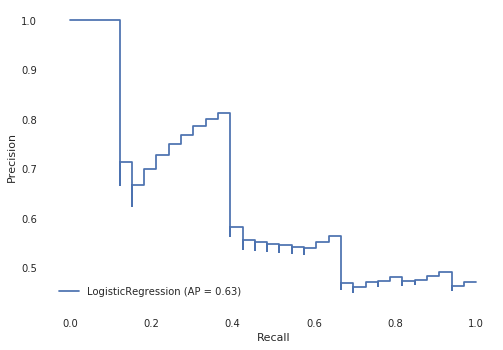

In [45]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(log_reg,X_test,y_test)

In [0]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds = precision_recall_curve(y_test,y_pred)

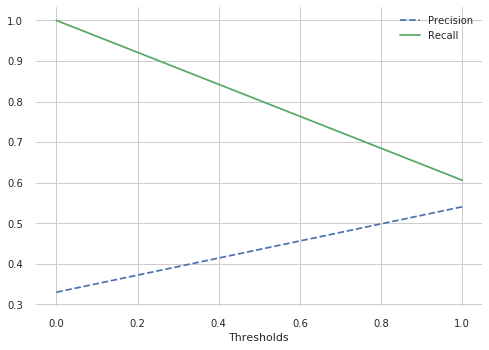

In [50]:
sns.set_style('whitegrid')
plt.plot(thresholds,precision[:-1],'b--',label='Precision')
plt.plot(thresholds,recall[:-1],'g-',label='Recall')
plt.legend()
plt.xlabel('Thresholds')
plt.show()

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

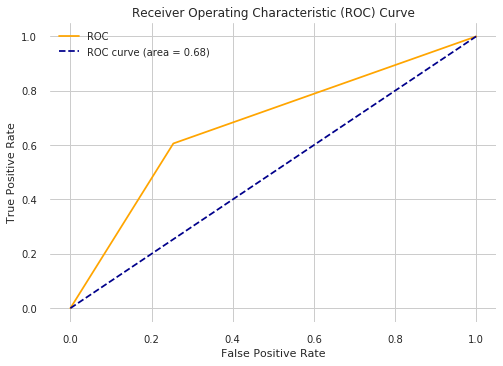

In [52]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

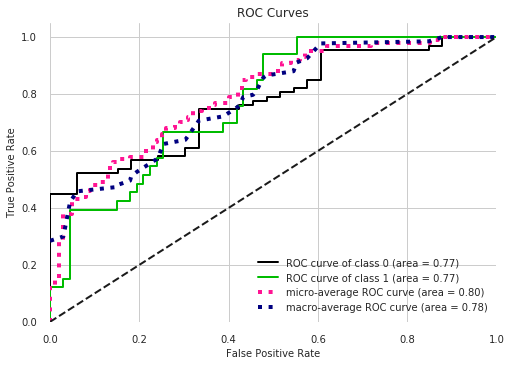

In [53]:
skl.metrics.plot_roc_curve(y_test,log_reg.predict_proba(X_test))

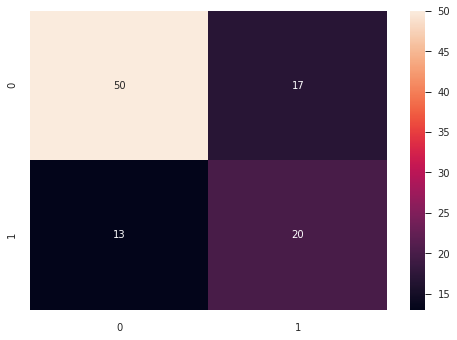

In [54]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        67
           1       0.54      0.61      0.57        33

    accuracy                           0.70       100
   macro avg       0.67      0.68      0.67       100
weighted avg       0.71      0.70      0.70       100



In [0]:
from sklearn.model_selection import learning_curve

## Plot Learning Curve

https://chrisalbon.com/machine_learning/model_evaluation/plot_the_learning_curve/

In [0]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(solver='liblinear'), 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        #train_sizes=np.linspace(0.01, 1.0, 50)
                                                        )

## Create means and standard deviations of training set scores


In [0]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [23]:
train_mean

array([0.7       , 0.81264368, 0.66013514, 0.65550239, 0.78814815])

## Create means and standard deviations of test set scores


In [0]:
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

## Draw lines and Draw bands


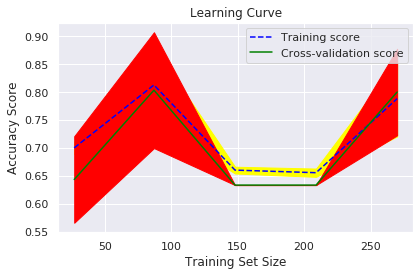

In [25]:
plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="green", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="yellow")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [0]:
features = pd.concat([X_train,X_test],axis=0)
labels = pd.concat([y_train,y_test],axis=0)

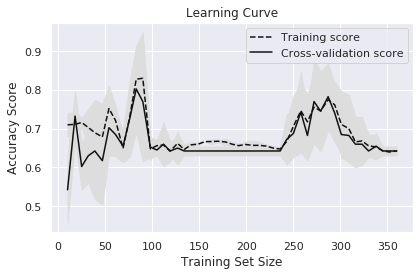

In [28]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(solver='liblinear'), 
                                                        features, 
                                                        labels,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50)
                                                        )

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Visualize the effect of number of observations on the performance of the model